In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sklearn
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# Model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Deep learning
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, accuracy_score, log_loss, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split, cross_val_score

# Get Data

In [2]:
df = pd.read_csv('advertising.csv')
df.drop_duplicates(inplace=True)
label = 'Clicked on Ad'

# Exploratory Data Analysis

## Data Overview  & Initial Processing

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Visualization

### 1D Plot

**Histograms (all)**

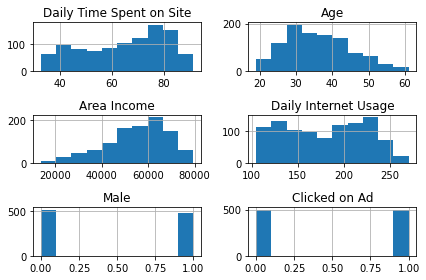

In [6]:
df.hist()
plt.tight_layout()

**Data Type Adjust & Seperation**

In [7]:
num_features = df.select_dtypes(include=['int64', 'float64'])
cat_features = df.select_dtypes(include=['object'])

**Density Plot (numeric)**

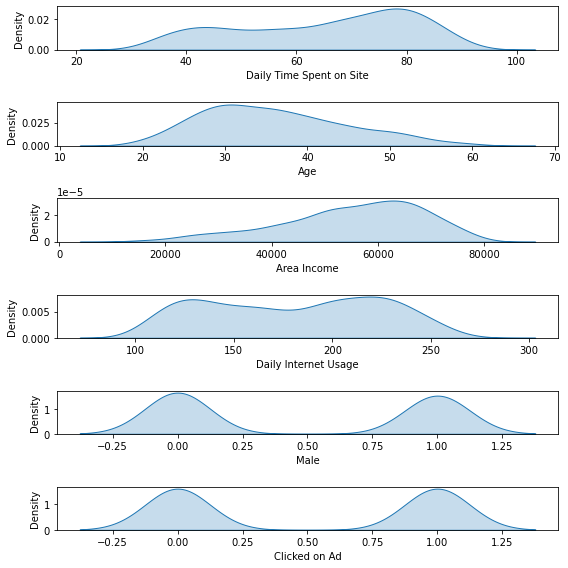

In [8]:
n = len(num_features.columns)
axs = ()
for i in range(n):
    tmp = 'ax' + str(i)
    axs = axs + (tmp,)
    
f, axs = plt.subplots(n,figsize=(8, 8))
for j in range(n):
    sns.kdeplot(num_features.iloc[:,j], ax=axs[j],shade=True)
plt.tight_layout()

### 2D Plot

#### Heatmap (all)

In [9]:
print('======== Correlation with Label ========')
print(df.corr()[label].sort_values().drop(label))

======== Correlation with Label ========
Daily Internet Usage       -0.786539
Daily Time Spent on Site   -0.748117
Area Income                -0.476255
Male                       -0.038027
Age                         0.492531
Name: Clicked on Ad, dtype: float64


<AxesSubplot:>

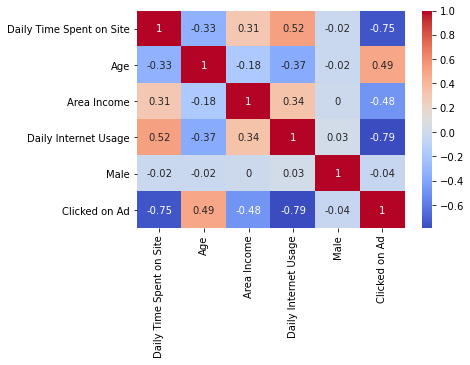

In [10]:
sns.heatmap(round(df.corr(),2), annot=True, cmap="coolwarm")

#### Pairplot (all)

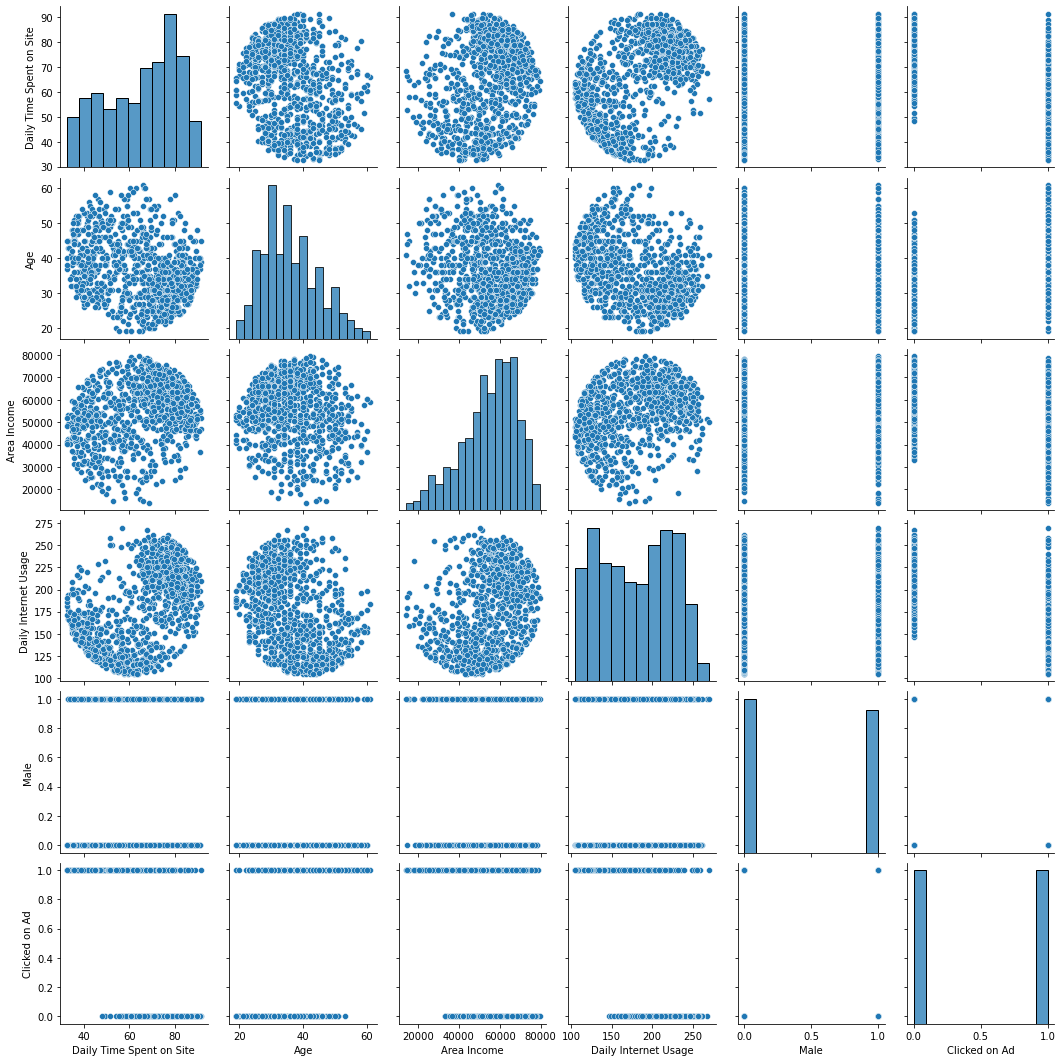

In [11]:
sns.pairplot(df,palette='bwr')

#### Jointplot (numeric)

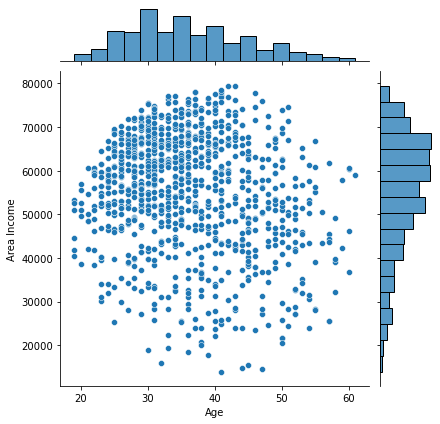

In [12]:
sns.jointplot(x='Age',y='Area Income',data=df)

**Jointplot showing the kde distributions**

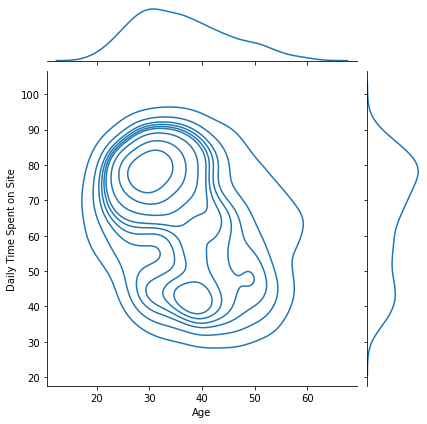

In [14]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde');

#### Countplot (categorical)

<AxesSubplot:xlabel='Male', ylabel='count'>

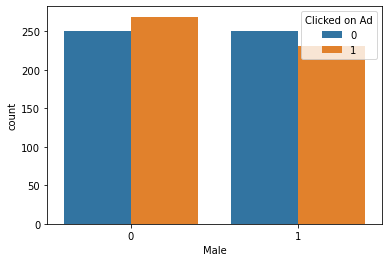

In [15]:
sns.countplot(x="Male", hue=label, data=df)

#### FacetGrid (mixed)

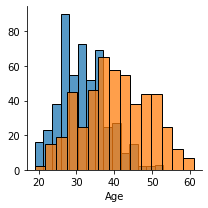

In [16]:
g = sns.FacetGrid(df, hue=label)
g.map(sns.histplot, 'Age', kde=False, bins=15)

#### Boxplot (mixed)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

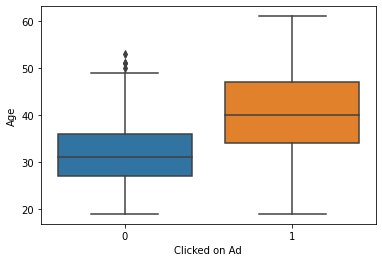

In [17]:
sns.boxplot(x=label, y='Age', data=df)

#### Violinplot (mixed)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

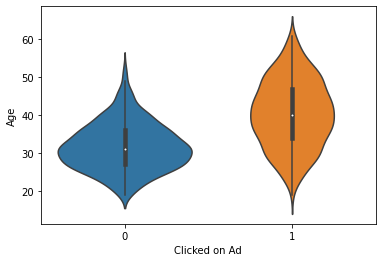

In [18]:
sns.violinplot(x=label, y='Age', data=df)

### 3D Plot

#### Pairplot with hue (all)

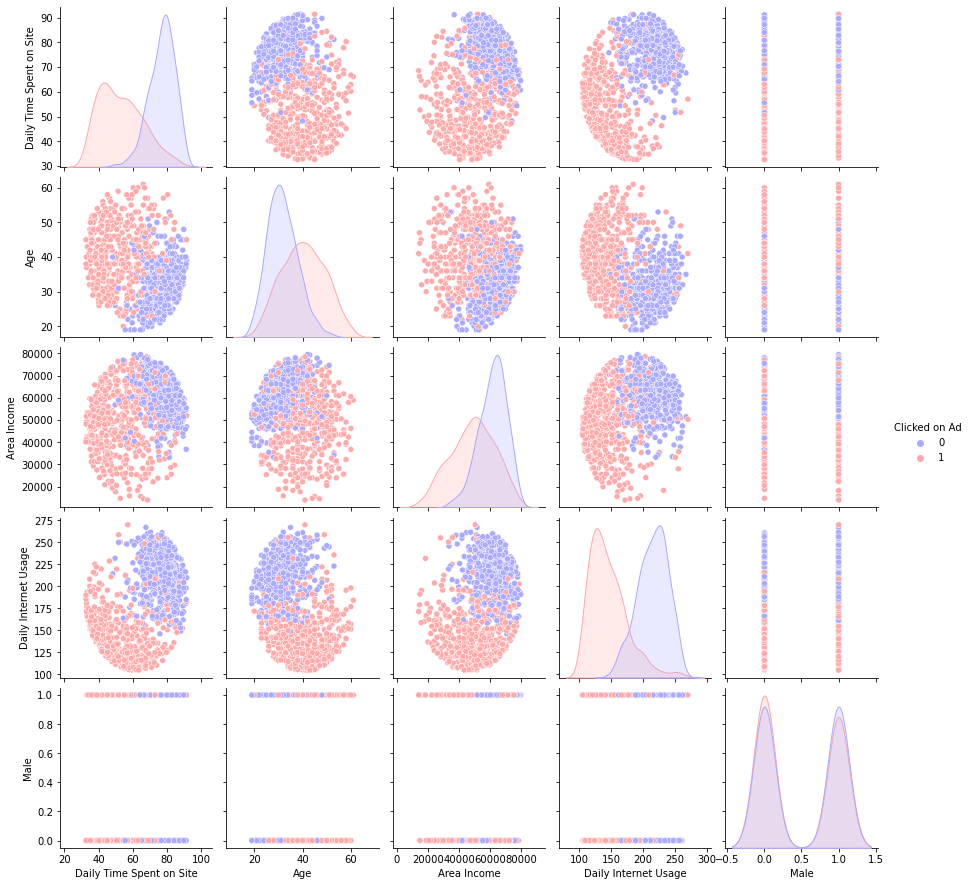

In [19]:
sns.pairplot(df,hue=label,palette='bwr')

#### Scatter with 3D axises (numeric)

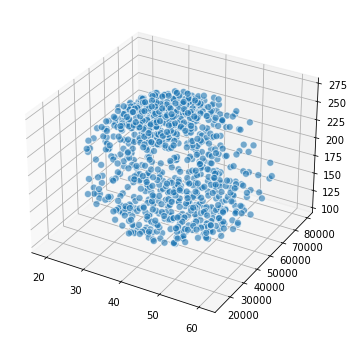

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['Area Income']
zs = df['Daily Internet Usage']
ax.scatter(xs, ys, zs, alpha=0.6, s=50, edgecolors='w')

#### Scatter with size (Bubble chart) (numeric)

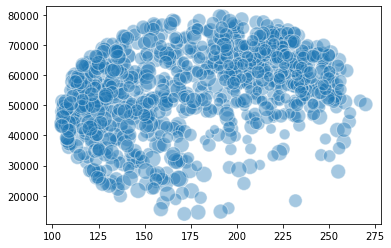

In [21]:
plt.scatter(df['Daily Internet Usage'], df['Area Income'], s=df['Age']*5, alpha=0.4, edgecolors='w')

#### Kdeplot with overlapping (mixed - 1 categorical)

<AxesSubplot:xlabel='Age', ylabel='Daily Internet Usage'>

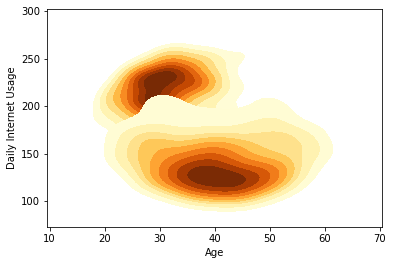

In [22]:
sns.kdeplot(x=df[df[label]==0]['Age'], y=df[df[label]==0]['Daily Internet Usage'],cmap="YlOrBr", shade=True, thresh=0.1)
sns.kdeplot(x=df[df[label]==1]['Age'], y=df[df[label]==1]['Daily Internet Usage'],cmap="YlOrBr", shade=True, thresh=0.1)

#### Boxplot (mixed - 2 categorical)

<AxesSubplot:xlabel='Male', ylabel='Age'>

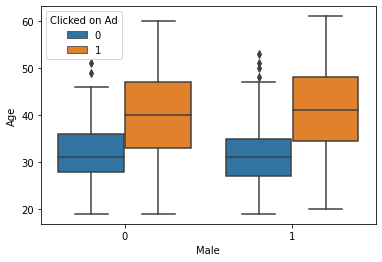

In [23]:
sns.boxplot(x='Male', y='Age', hue=label, data=df)

#### Violinplot (mixed - 2 categorical)

<AxesSubplot:xlabel='Male', ylabel='Age'>

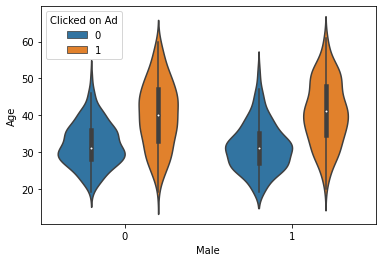

In [24]:
sns.violinplot(x='Male', y='Age', hue=label, data=df)

### 4D Plot

#### Scatter with 3D axises & color (mixed - 1 categorical)

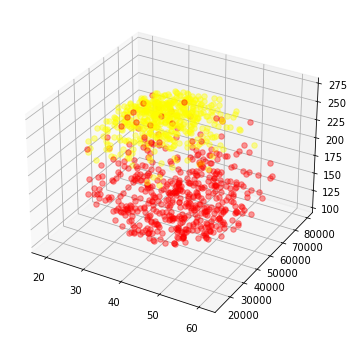

In [113]:
xs = list(df['Age'])
ys = list(df['Area Income'])
zs = list(df['Daily Internet Usage'])
colors = ['red' if y == 1 else 'yellow' for y in list(df[label])]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
for i in range(len(xs)):
    ax.scatter(xs[i], ys[i], zs[i], c=colors[i], alpha=0.4, s=30)
plt.show()

#### Scatter with color & size (mixed - 1 categorical)

Text(0.5, 1.05, 'Area Income - Daily Internet Usage - Age - Clicked on Ad')

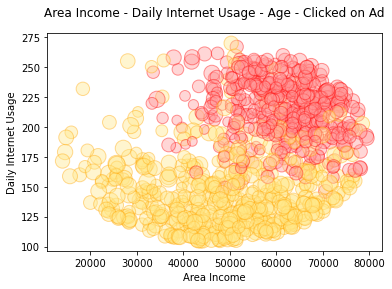

In [26]:
size = df['Age'] * 5
fill_colors = ['#FF9999' if y==0 else '#FFE888' for y in list(df[label])]
edge_colors = ['red' if y==0 else 'orange' for y in list(df[label])]

plt.scatter(df['Area Income'], df['Daily Internet Usage'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Area Income')
plt.ylabel('Daily Internet Usage')
plt.title('Area Income - Daily Internet Usage - Age - Clicked on Ad',y=1.05)

#### Scatter with hue and facets (mixed - 2 categorical)

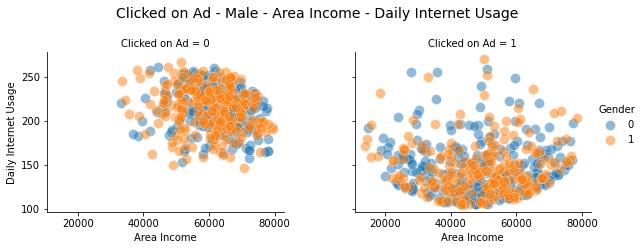

In [27]:
g = sns.FacetGrid(df, col=label, hue='Male', aspect=1.2, height=3.5)
g.map(plt.scatter, "Area Income", "Daily Internet Usage", alpha=0.5, edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Clicked on Ad - Male - Area Income - Daily Internet Usage', fontsize=14)
g.add_legend(title='Gender')

# Data Preprocessing

## Data Analysis

In [3]:
def outliers(col):
    std3 = col.std() * 3
    mean = col.mean()
    c = 0
    for row in col:
        if abs(row-mean) > std3:
            c += 1
    return c

In [4]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
df_num = df[num_features]

In [5]:
def outlier_analysis(df_num):
    n = df_num.shape[0]
    ls_analysis = []
    for col in df_num:
        outlier = outliers(df_num[col])

        ls_analysis.append([col,outlier/n*100])

    df_outlier_analysis = pd.DataFrame(ls_analysis, columns=['Columns','Outliers%'])
    return df_outlier_analysis

print(outlier_analysis(df_num))

                    Columns  Outliers%
0  Daily Time Spent on Site        0.0
1                       Age        0.0
2               Area Income        0.2
3      Daily Internet Usage        0.0
4                      Male        0.0
5             Clicked on Ad        0.0


In [6]:
def analysis(df):
    n = df.shape[0]
    ls_analysis = []
    ls_unique = []
    for col in df:
        # missing data
        missing = sum(df[col].isnull())

        # imbalance data
        counts = df[col].value_counts().values
        counts.sort()
        imblance = counts[-1]

        # unique
        unique = df[col].nunique()
        if unique/n < 0.03:
            ls_unique.append(col)

        ls_analysis.append([col,missing/n*100, imblance/n*100, unique/n*100])

    df_analysis = pd.DataFrame(ls_analysis, columns=['Columns','Missing%','Imbalance%','Unique%'])
    return df_analysis, ls_unique

In [7]:
df_analysis, ls_unique = analysis(df)
print(df_analysis)

                    Columns  Missing%  Imbalance%  Unique%
0  Daily Time Spent on Site       0.0         0.3     90.0
1                       Age       0.0         6.0      4.3
2               Area Income       0.0         0.1    100.0
3      Daily Internet Usage       0.0         0.2     96.6
4             Ad Topic Line       0.0         0.1    100.0
5                      City       0.0         0.3     96.9
6                      Male       0.0        51.9      0.2
7                   Country       0.0         0.9     23.7
8                 Timestamp       0.0         0.1    100.0
9             Clicked on Ad       0.0        50.0      0.2


In [8]:
ls_unique.remove(label)
print(ls_unique)

['Male']


## Feature Engineering

## Train/Test Split

In [9]:
X = df.drop(label,axis=1)
X.drop(['Timestamp','Ad Topic Line'], axis=1, inplace=True)
X[ls_unique]= X[ls_unique].astype(object)

y = df[label]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   City                      1000 non-null   object 
 5   Male                      1000 non-null   object 
 6   Country                   1000 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 62.5+ KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Data Type Seperation

In [21]:
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

## Data Transformation

In [22]:
num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler(quantile_range=[5, 95])),
    ('norm', Normalizer(norm='l2')),
    ('pca', PCA(whiten=True, random_state=0))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)])

## Feature Selection

In [14]:
n_features = 10

# # Removing features with low variance
# fs = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Univariate feature selection
# Regression: f_regression, mutual_info_regression; Classification: chi2, f_classif, mutual_info_classif
# fs = SelectKBest(chi2, k=n_features)

# # Recursive feature elimination
# fs = RFE(estimator=SVC(kernel="linear", C=1), n_features_to_select=n_features, step=1)

# # Feature selection using SelectFromModel
# # L1-based feature selection
# fs = SelectFromModel(LinearSVC(C=0.01, penalty="l1"))
# Tree-based feature selection
fs = SelectFromModel(ExtraTreesClassifier(n_estimators=50))

# Model Selection & Tuning

## Classical Learning

### Pipeline

In [15]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(C=0.025, probability=True),
    NuSVC(probability=True,kernel='rbf',nu=0.01),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]

In [16]:
table = PrettyTable(['Model','Score'])

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', fs),
                           ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    score = round(pipe.score(X_test, y_test),4)
    table.add_row([classifier, score])
    
#     print(classifier)
#     print(classification_report(y_test, y_pred))

print(table)

+-------------------------------------+--------+
|                Model                | Score  |
+-------------------------------------+--------+
|         LogisticRegression()        | 0.9606 |
| KNeighborsClassifier(n_neighbors=3) | 0.9455 |
|    SVC(C=0.025, probability=True)   | 0.9576 |
|   NuSVC(nu=0.01, probability=True)  | 0.9455 |
|       DecisionTreeClassifier()      | 0.9545 |
|       RandomForestClassifier()      | 0.9606 |
|         AdaBoostClassifier()        | 0.9545 |
|     GradientBoostingClassifier()    | 0.9606 |
|           SGDClassifier()           | 0.9576 |
+-------------------------------------+--------+


### Model Tuning

In [17]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('feature_selection', fs),
                     ('classifier', RandomForestClassifier())])

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}

CV = GridSearchCV(rf, param_grid)
                  
CV.fit(X_train, y_train)  
print('Best Parameters:',CV.best_params_)
print('Best Score:', CV.best_score_)
y_pred = CV.predict(X_test)
print(classification_report(y_test,y_pred))

KeyboardInterrupt: 

## Neural Network

### Data Transformation

In [18]:
X_train_transformed = Pipeline(pipe.steps[:-2]).fit_transform(X_train).toarray()
X_test_transformed = Pipeline(pipe.steps[:-2]).transform(X_test).toarray()

In [19]:
encoder = LabelEncoder()
y_train_transformed = encoder.fit_transform(y_train)
y_test_transformed = encoder.transform(y_test)

### Model

In [20]:
n_features = X_train_transformed.shape[1]
n_classes = df[label].nunique()
print('Number of Features:', n_features)
print('Number of Classes:', n_classes)

Number of Features: 896
Number of Classes: 2


In [93]:
loss_dic = {'binary_crossentropy': 'sigmoid', 'hinge': 'tanh', 'squared_hinge': 'tanh',
            'categorical_crossentropy': 'softmax','sparse_categorical_crossentropy': 'softmax', 'kullback_leibler_divergence': 'softmax',
           'mean_squared_error':'linear', 'mean_squared_logarithmic_error': 'linear', 'mean_absolute_error': 'linear'}
loss = 'binary_crossentropy'

In [94]:
dropout = 0.5 # 0.1 to 0.5; 0.3 for RNNs, and 0.5 for CNNs
batch_size = 20 # between 2 and 32
learning_rate = 1e-3 # 1^-7 to 10
activation='selu' # logistic → tanh → ReLU → Leaky ReLU → ELU → SELU (from lowest→highest performing)

# Define model
model = Sequential()

# Weight initialization
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')

# Input layer
model.add(Dense(n_features,activation='relu', input_shape=(n_features,)))


# Hidden layer
model.add(Dropout(dropout))
#BatchNormalization()
model.add(Dense(100,activation=activation))

model.add(Dropout(dropout))
model.add(Dense(100,activation=activation))

model.add(Dropout(dropout))
model.add(Dense(100,activation=activation))

model.add(Dropout(dropout))
model.add(Dense(100,activation=activation))

model.add(Dropout(dropout))
model.add(Dense(100,activation=activation))

model.add(Dropout(dropout))

# Output layer
model.add(Dense(1,activation=loss_dic[loss])) 

# model.summary()
# plot_model(model, 'model.png', show_shapes=True)

# optimizer: Adam, RMSprop, Adagrad, Adadelta, SGD, Momentum
sgd = SGD(learning_rate=learning_rate, momentum=0.9)
rms = RMSprop(learning_rate=learning_rate)
adam = Adam(learning_rate=learning_rate)

# compile model
model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, 
                           patience=3)

model.fit(X_train_transformed,y_train_transformed, epochs=500, validation_data=(X_test_transformed,y_test_transformed), 
          verbose=1, batch_size=batch_size, callbacks=[early_stop])

Train on 670 samples, validate on 330 samples
Epoch 1/500
670/670 [==============================] - 1s 2ms/sample - loss: 0.7354 - accuracy: 0.6657 - val_loss: 0.1549 - val_accuracy: 0.9515
Epoch 2/500
670/670 [==============================] - 0s 330us/sample - loss: 0.1898 - accuracy: 0.9328 - val_loss: 0.2229 - val_accuracy: 0.9485
Epoch 3/500
670/670 [==============================] - 0s 299us/sample - loss: 0.1666 - accuracy: 0.9597 - val_loss: 0.2579 - val_accuracy: 0.9515
Epoch 4/500
670/670 [==============================] - 0s 304us/sample - loss: 0.1388 - accuracy: 0.9567 - val_loss: 0.2228 - val_accuracy: 0.9576


======== Evaluation ========
Training Result: [0.06127743308624398, 0.9925373]
Test Result: [0.22279520918955864, 0.95757574]


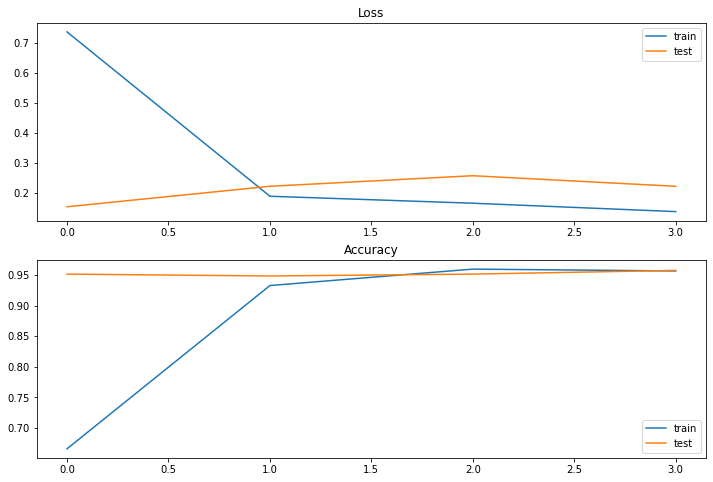

In [98]:
# evaluation
training_score = model.evaluate(X_train_transformed,y_train_transformed,verbose=0)
test_score = model.evaluate(X_test_transformed,y_test_transformed,verbose=0)
print('======== Evaluation ========')
print('Training Result:', training_score)
print('Test Result:', test_score)
history = pd.DataFrame(model.history.history)

# Plot
plt.figure(figsize=(12, 8))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='test')
plt.legend()
plt.show()